In [14]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
svm_model = SVC(probability=True)

In [5]:
df = pd.read_csv(r'C:\Users\DY\Documents\GitHub\UFCproject\df_ufc_masters_w_reversed.csv')

In [6]:
feature_names = [
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct',
    'B_Height_cms',
    'B_Reach_cms',
    'R_Height_cms',
    'R_Reach_cms'
]


array([[<Axes: title={'center': 'B_avg_SIG_STR_landed'}>,
        <Axes: title={'center': 'B_avg_SIG_STR_pct'}>,
        <Axes: title={'center': 'B_avg_SUB_ATT'}>,
        <Axes: title={'center': 'B_avg_TD_landed'}>],
       [<Axes: title={'center': 'B_avg_TD_pct'}>,
        <Axes: title={'center': 'R_avg_SIG_STR_landed'}>,
        <Axes: title={'center': 'R_avg_SIG_STR_pct'}>,
        <Axes: title={'center': 'R_avg_SUB_ATT'}>],
       [<Axes: title={'center': 'R_avg_TD_landed'}>,
        <Axes: title={'center': 'R_avg_TD_pct'}>,
        <Axes: title={'center': 'B_Height_cms'}>,
        <Axes: title={'center': 'B_Reach_cms'}>],
       [<Axes: title={'center': 'R_Height_cms'}>,
        <Axes: title={'center': 'R_Reach_cms'}>, <Axes: >, <Axes: >]],
      dtype=object)

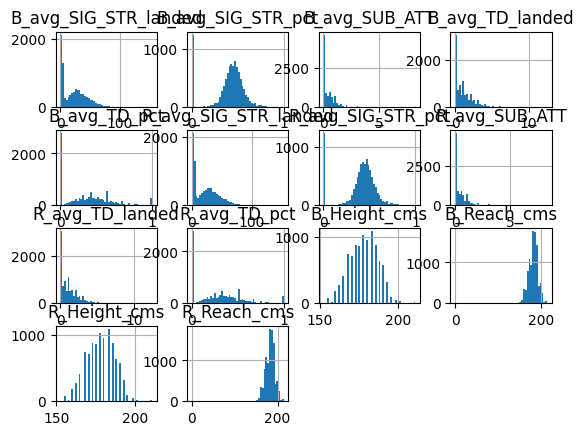

In [7]:
df[feature_names].hist(bins=50)

In [12]:
# List of columns to apply np.log
columns_to_log = ['B_avg_SIG_STR_landed', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 
                  'R_avg_SIG_STR_landed', 'R_avg_SUB_ATT', 'R_avg_TD_landed']

# Applying np.log to each column in the list
for col in columns_to_log:
    # Adding a small constant to avoid log(0) which is undefined
    df[col] = np.log(df[col] + 1e-5)

C:\Users\DY\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'B_avg_SIG_STR_landed'}>,
        <Axes: title={'center': 'B_avg_SUB_ATT'}>],
       [<Axes: title={'center': 'B_avg_TD_landed'}>,
        <Axes: title={'center': 'R_avg_SIG_STR_landed'}>],
       [<Axes: title={'center': 'R_avg_SUB_ATT'}>,
        <Axes: title={'center': 'R_avg_TD_landed'}>]], dtype=object)

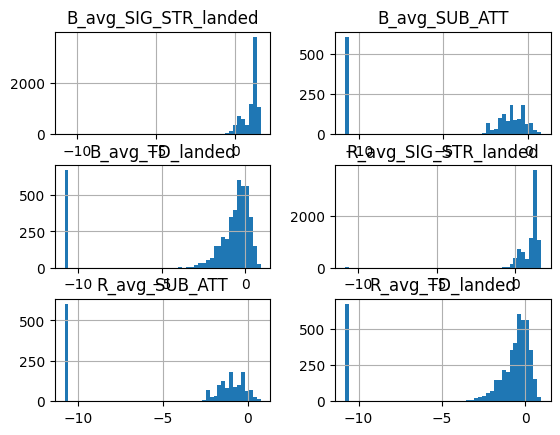

In [13]:
df[columns_to_log].hist(bins=50)

In [16]:
features_std_sc = [
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct',
    'B_Height_cms',
    'B_Reach_cms',
    'R_Height_cms',
    'R_Reach_cms'
]

In [17]:
sc = StandardScaler()
sc.fit(df[features_std_sc])
df[['B_avg_SIG_STR_landed_ss',
    'B_avg_SIG_STR_pct_ss',
    'B_avg_SUB_ATT_ss',
    'B_avg_TD_landed_ss',
    'B_avg_TD_pct_ss',
    'R_avg_SIG_STR_landed_ss',
    'R_avg_SIG_STR_pct_ss',
    'R_avg_SUB_ATT_ss',
    'R_avg_TD_landed_ss',
    'R_avg_TD_pct_ss',
    'B_Height_cms_ss',
    'B_Reach_cms_ss',
    'R_Height_cms_ss',
    'R_Reach_cms_ss']] = sc.transform(df[features_std_sc])

In [ ]:
svm_model.fit(X_train_scaled, y_train)

In [ ]:
svm_pred_proba = svm_model.predict_proba(X_test_scaled)

In [ ]:
svm_pred_percent = svm_pred_proba * 100